In [4]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [7]:
(Xtrain,Ytrain),(xtest,ytest)=keras.datasets.mnist.load_data()

In [10]:
len(Xtrain)

60000

In [13]:
len(xtest)

10000

In [14]:
Xtrain[0].shape

(28, 28)

In [16]:
xtest[0].shape

(28, 28)

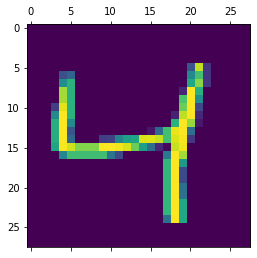

In [20]:
plt.matshow(Xtrain[2])

In [22]:
Ytrain[2]

4

In [24]:
Ytrain.shape

(60000,)

In [27]:
Xtrain_flat=Xtrain.reshape(len(Xtrain),28*28)

In [29]:
Xtrain_flat.shape

(60000, 784)

In [31]:
xtest_flat=xtest.reshape(len(xtest),28*28)

In [33]:
xtest_flat.shape

(10000, 784)

In [37]:
model=keras.Sequential([keras.layers.Dense(10,input_shape=(784,),activation='sigmoid')])
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics= ['accuracy'])
model.fit(Xtrain_flat,Ytrain,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 1s 534us/step - loss: 18.5111 - accuracy: 0.7646
Epoch 2/5
1875/1875 [==============================] - 1s 570us/step - loss: 6.0520 - accuracy: 0.8782
Epoch 3/5
1875/1875 [==============================] - 1s 524us/step - loss: 5.3453 - accuracy: 0.8871
Epoch 4/5
1875/1875 [==============================] - 1s 558us/step - loss: 5.2891 - accuracy: 0.8861
Epoch 5/5
1875/1875 [==============================] - 1s 565us/step - loss: 5.2201 - accuracy: 0.8872


In [40]:
model.evaluate(xtest_flat,ytest)

313/313 [==============================] - 0s 794us/step - loss: 5.3631 - accuracy: 0.8920


[5.363081455230713, 0.8920000195503235]

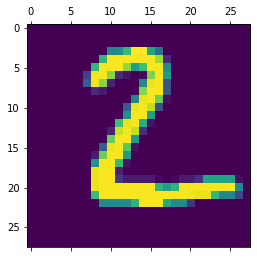

In [50]:
plt.matshow(xtest[1])

In [55]:
y_predicted=model.predict(xtest_flat)
y_predicted[1]

np.argmax(y_predicted[1])

2

In [57]:
y_pred_labels=[np.argmax(i) for i in y_predicted]

In [59]:
y_pred_labels[:5]

[3, 2, 1, 0, 2]

In [62]:
ytest[:5]

array([7, 2, 1, 0, 4], dtype=uint8)

In [65]:
cm=tf.math.confusion_matrix(labels=ytest,predictions=y_pred_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 978,    0,    1,    0,    1,    0,    0,    0,    0,    0],
       [   2, 1128,    3,    0,    1,    1,    0,    0,    0,    0],
       [ 180,  298,  543,    3,    6,    0,    1,    0,    1,    0],
       [ 163,   65,  472,  309,    0,    1,    0,    0,    0,    0],
       [  87,   11,  181,  162,  538,    1,    1,    0,    1,    0],
       [ 205,   12,  158,  243,  108,  162,    1,    0,    3,    0],
       [ 117,   36,  689,    5,   19,   67,   25,    0,    0,    0],
       [ 124,   79,  305,  492,   21,    4,    0,    3,    0,    0],
       [  62,  108,  567,  126,   43,   61,    1,    1,    5,    0],
       [  54,   27,  157,  602,  167,    2,    0,    0,    0,    0]])>

Text(69.0, 0.5, 'Truth')

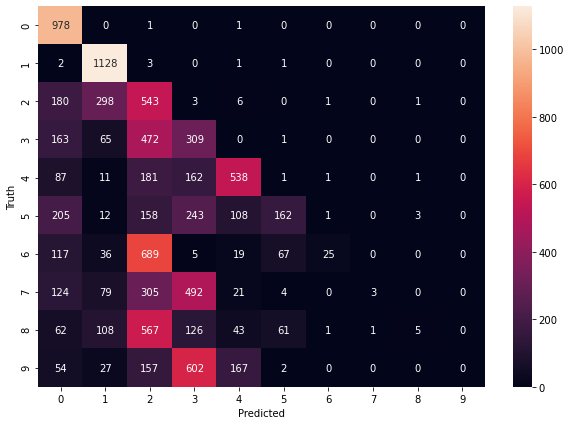

In [67]:
import seaborn as sn
plt.figure(figsize=(10,7))
sn.heatmap(cm,annot=True,fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [70]:
model=keras.Sequential([keras.layers.Dense(100,input_shape=(784,),activation='relu'),
                       keras.layers.Dense(10,activation='sigmoid')])
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics= ['accuracy'])
model.fit(Xtrain_flat,Ytrain,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 5s 2ms/step - loss: 7.3522 - accuracy: 0.7969
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4482 - accuracy: 0.8875
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3389 - accuracy: 0.9102
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2664 - accuracy: 0.9283
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2500 - accuracy: 0.9327


In [71]:
model.evaluate(xtest_flat,ytest)

313/313 [==============================] - 1s 2ms/step - loss: 0.2827 - accuracy: 0.9337


[0.2826923727989197, 0.9337000250816345]

Text(69.0, 0.5, 'Truth')

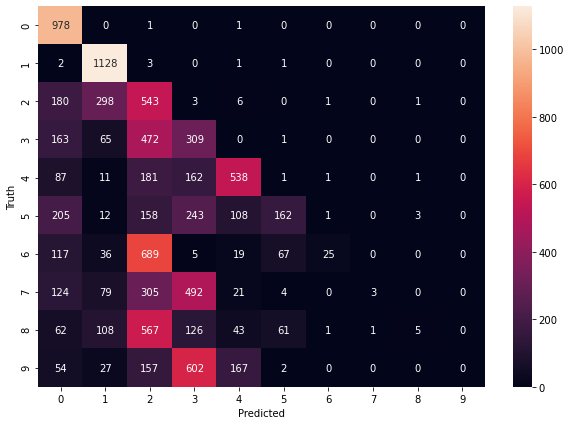

In [72]:
import seaborn as sn
plt.figure(figsize=(10,7))
sn.heatmap(cm,annot=True,fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')